<a href="https://colab.research.google.com/github/ykitaguchi77/Strabismus_AI_project/blob/main/Calculate_age_3class_notcut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import os
import pandas as pd
import sys
import shutil
import numpy as np
import matplotlib.pyplot as plt

#google driveをcolabolatoryにマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
pd.set_option('display.max_columns', 10)

def openCSV(csv_path):
    #df = pd.read_csv(csv_path, encoding="shift-jis")
    df = pd.read_csv(csv_path, encoding="utf-8",header=None)
    #df = pd.read_csv(csv_path, encoding="cp932")
    #df = df.drop(df.columns[[0]], axis=1) #1列目を削除する
    #print(df)
    return df

#CSVを開く （csv1:編集するファイル、csv2:参照するファイル）
csv2_path = '/content/drive/MyDrive/Deep_learning/Facephoto_LIST/DiseaseInfo_all_connected_new3.csv'
df2 = openCSV(csv2_path) #CSVを開く
df2

#パスから画像名のリストを作成
img_path = "/content/drive/MyDrive/Deep_learning/Strabismus/dataset(3class_notcut)"

contlist, extelist, intelist = [], [], []

#path = "/content/drive/MyDrive/Deep_learning/Strabismus/dataset(3class_notcut)/train/exte/e126.jpg"
#このうち126の部分のみを取り出す

cont_name = glob.glob(img_path +"/*/Cont/*")
for i in cont_name:
    contlist.append(int(os.path.basename(os.path.splitext(i)[0])))
contlist=sorted(contlist)

exte_name = glob.glob(img_path +"/*/Exte/*")
for i in exte_name:
    extelist.append(int(os.path.basename(os.path.splitext(i)[0]).lstrip("e").split("-")[0]))
    #extelist.append(int(os.path.basename(os.path.splitext(i)[0])))
extelist=sorted(extelist)
    
inte_name = glob.glob(img_path +"/*/Inte/*")
for i in inte_name:
    intelist.append(int(os.path.basename(os.path.splitext(i)[0]).lstrip("i").split("-")[0]))
    #intelist.append(int(os.path.basename(os.path.splitext(i)[0])))
intelist=sorted(intelist)

In [21]:
def extract(imgname_list, df_orig):
    #もとのcsvと列名を揃えたデータフレームを作成
    cols =  df_orig.columns
    df_dst = pd.DataFrame(index=[], columns=cols)

    for i in imgname_list:
        df_add = df_orig[df_orig.iloc[0:,2] ==i] #df_origの2列目がimagename_listと一致する行を抜き出す
        df_dst = pd.concat([df_dst, df_add]) #抜き出した行を連結していく
    return df_dst

df_cont = extract(contlist, df2)
df_exte = extract(extelist, df2)
df_inte = extract(intelist, df2)

cont
n=331
max: 0
min: 84
median: 49
mean: 43.03021148036254
sd: 24.31558285028512

exte
n=318
max: 0
min: 82
median: 10.0
mean: 23.270440251572328
sd: 25.004778227179404

inte
n=302
max: 0
min: 86
median: 5.0
mean: 17.301324503311257
sd: 23.960070568104907

total
n=951
max: 0
min: 86
median: 17
mean: 28.252365930599368
sd: 26.803523573877886

cont vs eso
p=MannwhitneyuResult(statistic=21500.0, pvalue=1.3071754882996997e-35)

cont vs exo
p=MannwhitneyuResult(statistic=29537.0, pvalue=1.9652402878291015e-22)

cont vs eso
p=3.629654118204814e-36


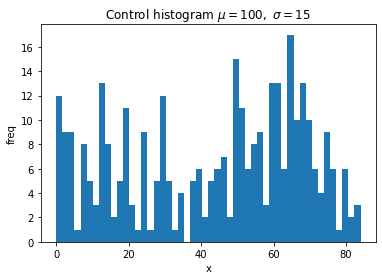

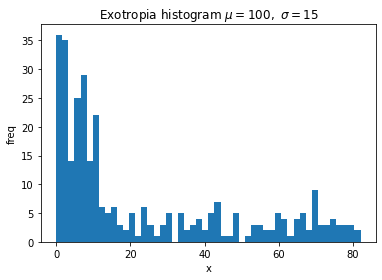

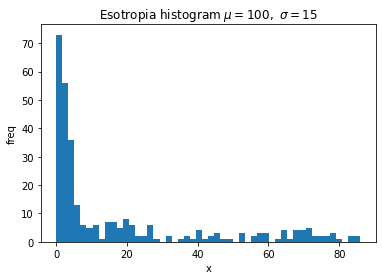

In [22]:
import statistics
import math
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind

def statistics_age(age_list):
    print("n=" +str(len(age_list)))
    print("max: "+str(min(age_list)))
    print("min: "+str(max(age_list)))
    print("median: "+str(statistics.median(age_list)))
    print("mean: "+str(statistics.mean(age_list)))
    print("sd: "+str(statistics.stdev(age_list)))
    
print("cont")
cont_age = df_cont.iloc[:,4].tolist() #年齢は4列目を参照する
statistics_age(cont_age)

print("")
print("exte")
exte_age = df_exte.iloc[:,4].tolist()
statistics_age(exte_age)

print("")
print("inte")
inte_age = df_inte.iloc[:,4].tolist()
statistics_age(inte_age)

print("")
print("total")
total_age = cont_age + exte_age + inte_age
statistics_age(total_age)

print("")
print("cont vs eso")
print("p="+str(stats.mannwhitneyu(cont_age, inte_age, use_continuity=True, alternative=None)))

print("")
print("cont vs exo")
print("p="+str(stats.mannwhitneyu(cont_age, exte_age, use_continuity=True, alternative=None)))

print("")
print("cont vs eso")
print("p="+str(ttest_ind(cont_age, inte_age)[1]))


#cont histogram
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(cont_age, bins=50)
ax.set_title('Control histogram $\mu=100,\ \sigma=15$')
ax.set_xlabel('x')
ax.set_ylabel('freq')
fig.show()

#exo histogram
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(exte_age, bins=50)
ax.set_title('Exotropia histogram $\mu=100,\ \sigma=15$')
ax.set_xlabel('x')
ax.set_ylabel('freq')
fig.show()

#eso histogram
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(inte_age, bins=50)
ax.set_title('Esotropia histogram $\mu=100,\ \sigma=15$')
ax.set_xlabel('x')
ax.set_ylabel('freq')
fig.show()